In [10]:
# Computing SVD
import numpy as np
X = np.random.rand(5,3)
#print(X)
U, S, VT = np.linalg.svd(X,full_matrices=True)
#For economy SVD
Uhat, Shat, VThat = np.linalg.svd(X,full_matrices=False)

#print([np.append(U, Uhat,axis=1)])
print([U, Uhat])
print([S, Shat])
print([VT==VThat])

[array([[-0.34133741, -0.03748342,  0.68662519, -0.16269159, -0.61980728],
       [-0.54345625,  0.26242865, -0.29398107, -0.72618911,  0.14836109],
       [-0.29668691, -0.56252956, -0.57977945,  0.15429347, -0.48537273],
       [-0.50150002,  0.58809016, -0.1102935 ,  0.62325237, -0.04516102],
       [-0.49861678, -0.51714278,  0.30628764,  0.18420321,  0.59682637]]), array([[-0.34133741, -0.03748342,  0.68662519],
       [-0.54345625,  0.26242865, -0.29398107],
       [-0.29668691, -0.56252956, -0.57977945],
       [-0.50150002,  0.58809016, -0.1102935 ],
       [-0.49861678, -0.51714278,  0.30628764]])]
[array([2.4496111 , 0.71122747, 0.43611647]), array([2.4496111 , 0.71122747, 0.43611647])]
[array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])]


(2000, 1500, 3)
(2000, 1500)
[2.97619391e+05 6.13288052e+04 4.79235274e+04 ... 4.86742144e+00
 4.70635876e+00 4.64139913e+00]


[Text(0, 0.5, 'fractional increase')]

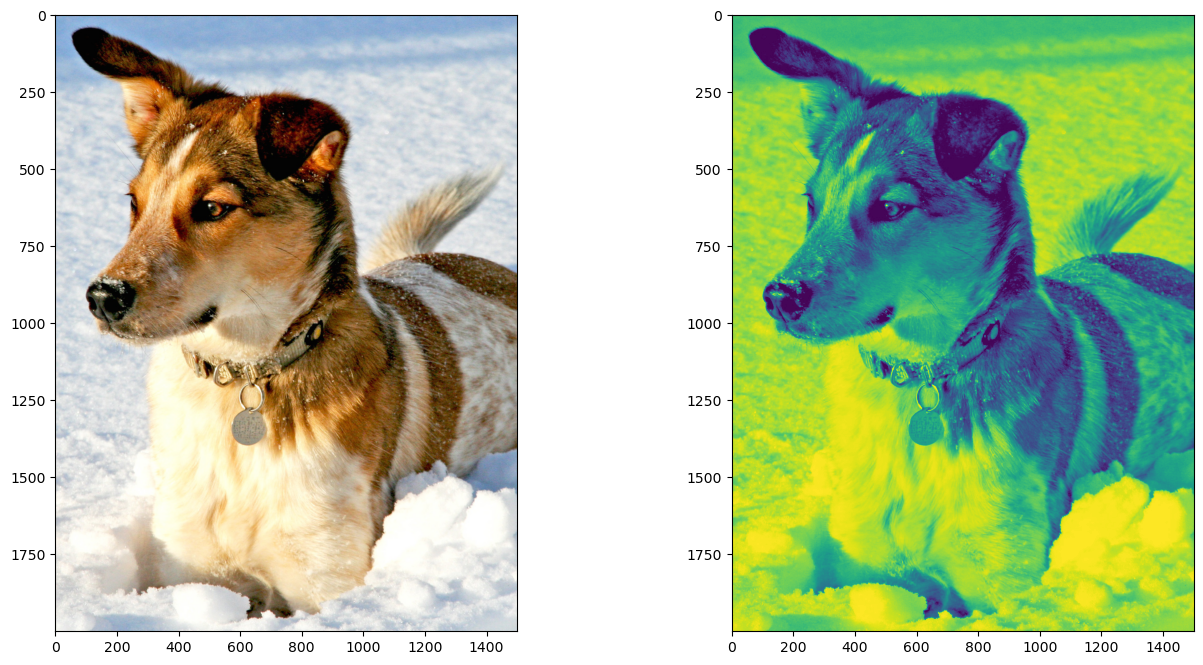

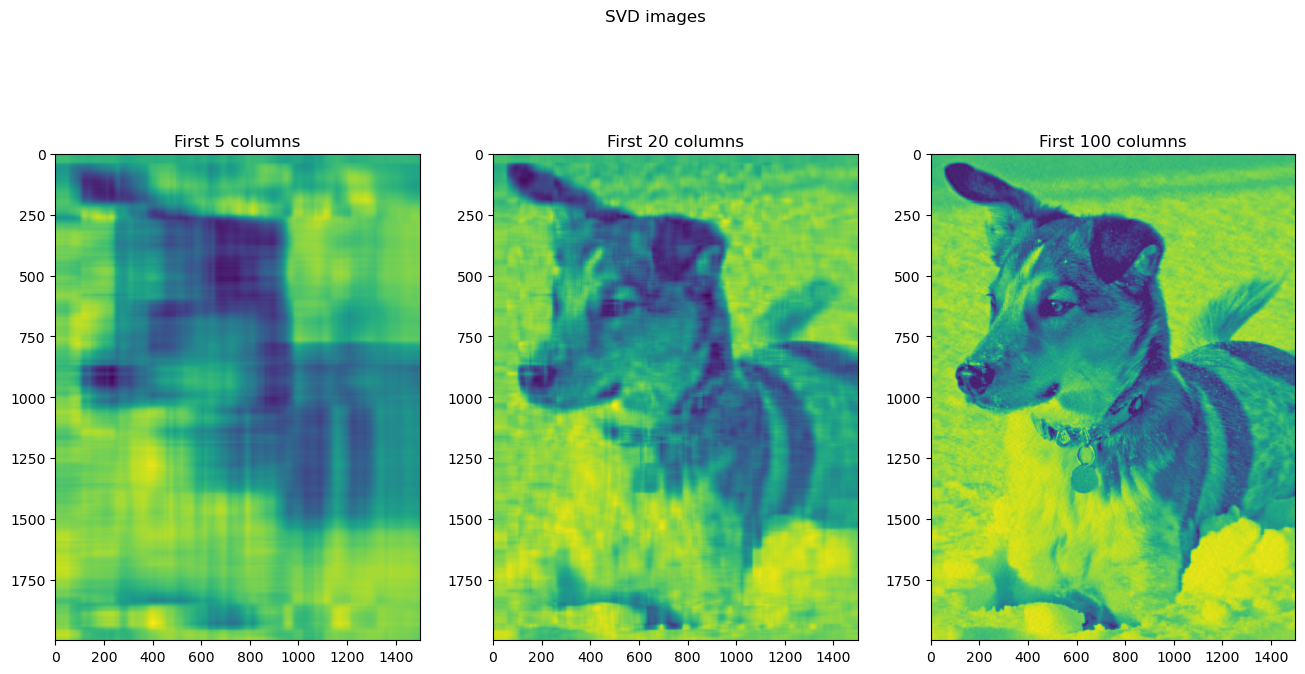

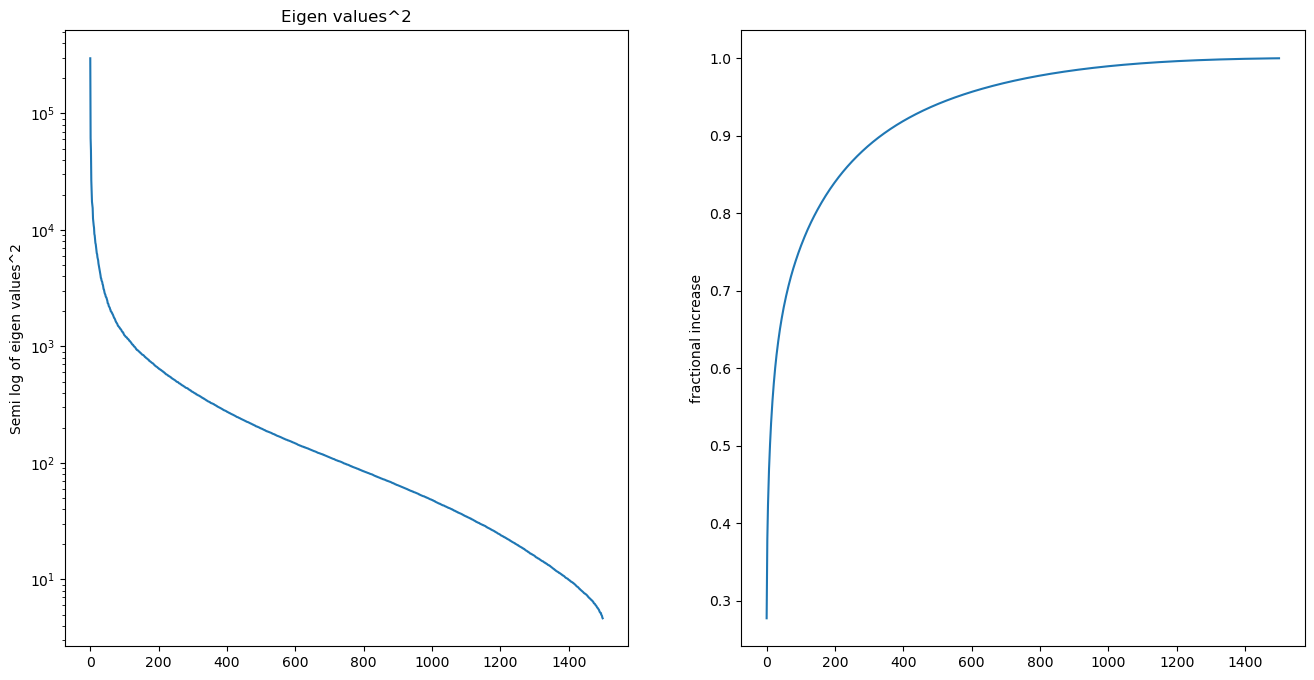

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
A = imread("DATA/dog.jpg")#Load the image   --- os.path.join('..','DATA','dog.jpg')
X = np.mean(A,-1)# convert to grayscale

plt.rcParams['figure.figsize'] = [16,8]
plt.figure()
plt.subplot(1,2,1)
img = plt.imshow(A)

print(np.shape(A))
print(np.shape(X))

plt.subplot(1,2,2)
img = plt.imshow(X)

U,S,VT = np.linalg.svd(X,full_matrices = False)
print(S)
S = np.diag(S)

fig = plt.figure()
plot_count = 1;
fig.suptitle("SVD images")
for r in [5, 20, 100]:
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    ax = plt.subplot(1,3,plot_count)
    img = plt.imshow(Xapprox)
    plot_count+=1
    ax.set_title(" ".join(["First",str(r),"columns"]))

plt.figure()
ax = plt.subplot(1,2,1)
plt.semilogy(np.diag(S))
ax.set_title("Eigen values^2")
ax.set(ylabel="Semi log of eigen values^2")
ax = plt.subplot(1,2,2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))   
ax.set(ylabel="fractional increase")

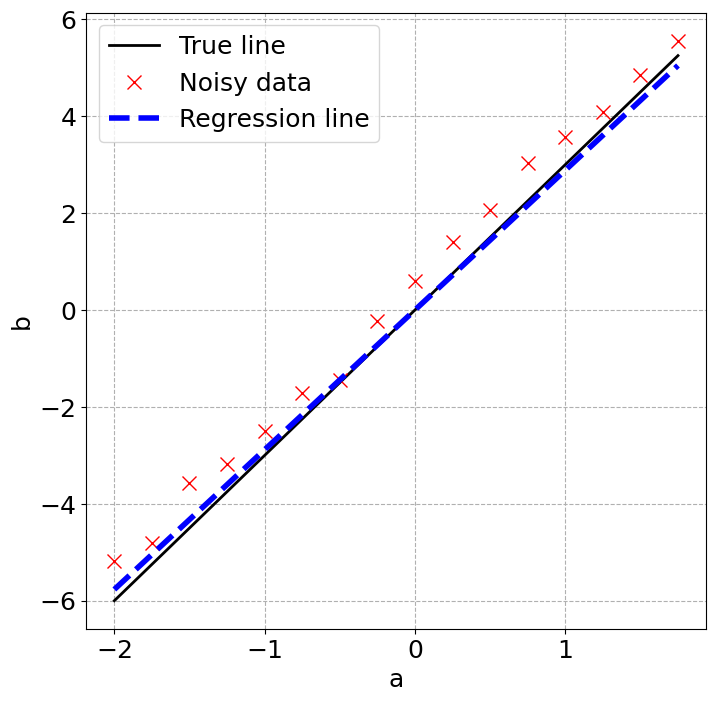

In [38]:
# Least-squares fit of noisy data 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size':18})

x = 3
a = np.arange(-2,2,0.25)
#print(a)
#print(np.shape(a))
a = a.reshape(-1,1)
#print(a)
#print(np.shape(a))

b = x*a + np.random.rand(*a.shape)
fig = plt.figure()

plt.plot(a, x*a, 'k', linewidth=2, label='True line') # True relationship
plt.plot(a,b,'xr',markersize = 10, label = 'Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices = False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least - square fit

plt.plot(a, xtilde*a, '--b', linewidth = 4, label = 'Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle = '--')

plt.legend()
plt.show()



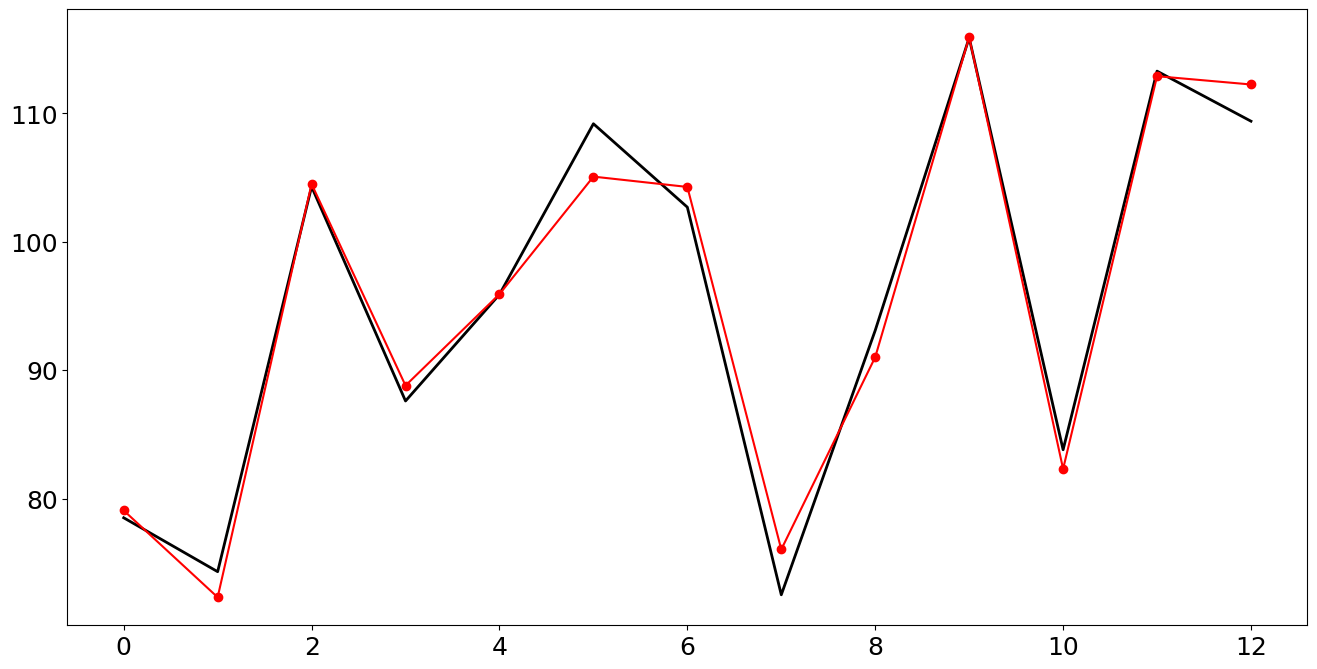

In [110]:
# Cement Heat Generation Data
import matplotlib.pyplot as plt
import numpy as np
A = np.loadtxt("DATA/hald_ingredients.csv", delimiter=',')
b = np.loadtxt("DATA/hald_heat.csv", delimiter=',')

U, S, VT = np.linalg.svd(A,full_matrices=0)
xtilda = VT.T@np.linalg.inv(np.diag(S))@U.T@b

plt.plot(b, 'k', linewidth = 2, label = 'Heat Data')
plt.plot(A@xtilda, '-or', label = 'Regression')

# Alternative approach
# xtilda = np.linalg.pinv(A)*b


Text(0, 0.5, 'Housing Price in $1k')

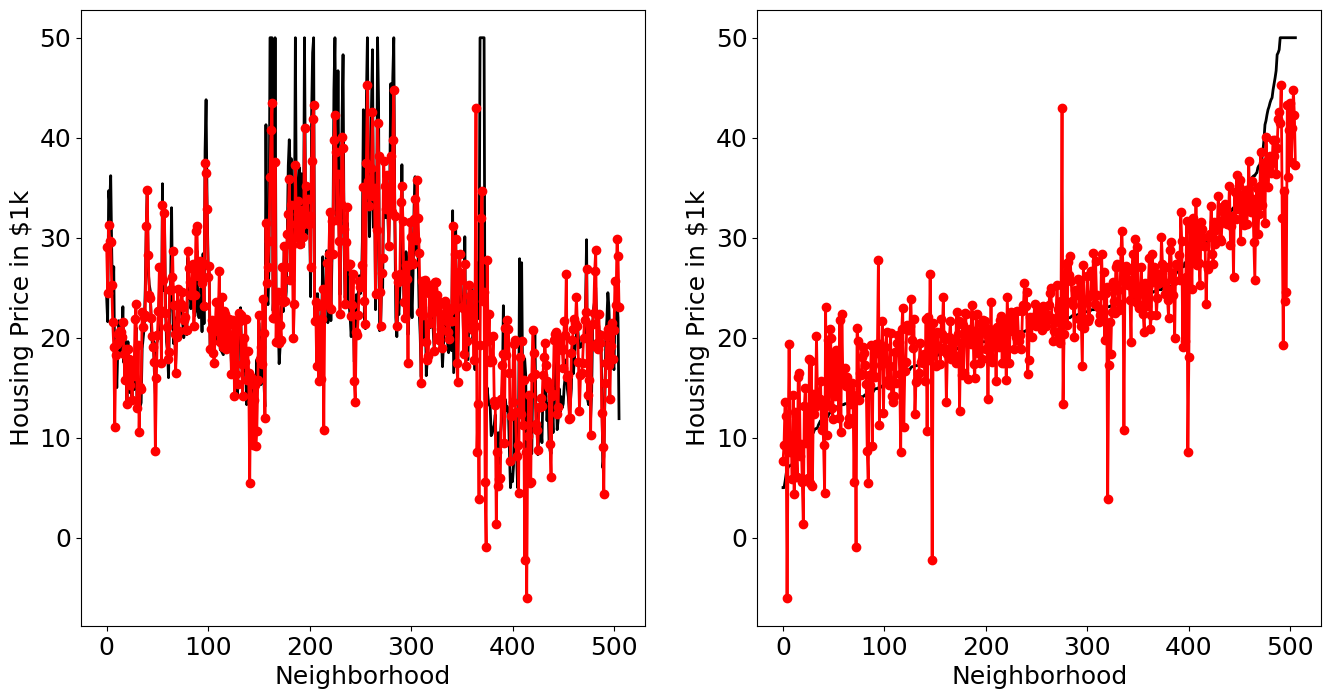

In [1]:
# Boston Housing Data
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
H = np.loadtxt('DATA/housing.data')
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

xtilda = np.linalg.pinv(A)@b

plt.subplot(1,2,1)
plt.plot(b,'k',linewidth = 2, label = 'Housing price in 1000$')
plt.plot(A@xtilda,'-or', linewidth = 2, label = 'Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Housing Price in $1k')

plt.subplot(1,2,2)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind]
plt.plot(b,'k',linewidth = 2, label='Housing Price')
plt.plot(A[sort_ind,:]@xtilda, '-or', linewidth = 2, label = 'Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Housing Price in $1k')


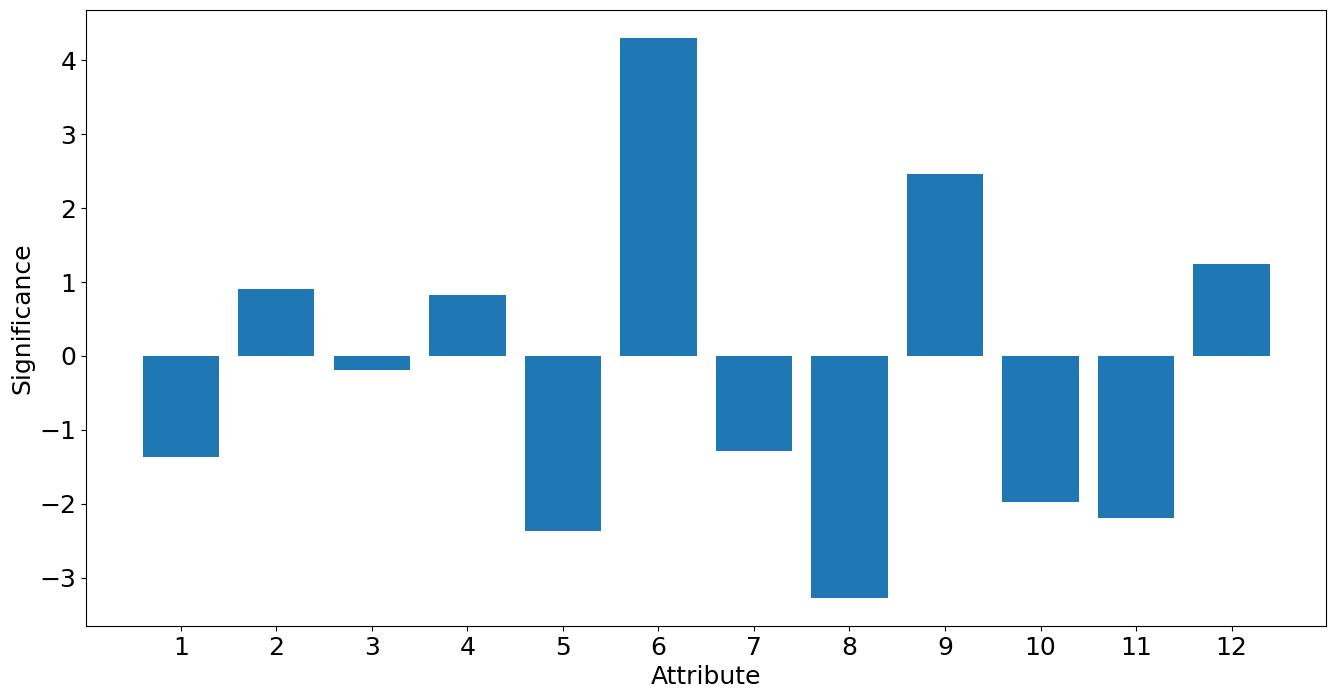

In [2]:
A_mean = np.mean(A,axis = 0)
#print(A_mean)
A_mean = A_mean.reshape(-1,1)
#print(A_mean)
#print(A.shape)
#print(A.shape[0])
#print(np.ones((A.shape[0],1)))
A2 = A - np.ones((A.shape[0],1))@A_mean.T
#print(A2.shape)

b = H[:,-1]

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] /=A2std
    
#print(A2.shape)
A2[:,-1] = np.ones(A.shape[0])

xtilda = np.linalg.pinv(A2)@b

xtick = range(len(xtilda)-1)+ np.ones(len(xtilda)-1)
#print(list(range(len(xtilda)-1)))
#print(xtick)
plt.bar(xtick,xtilda[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(xtick)
plt.show()


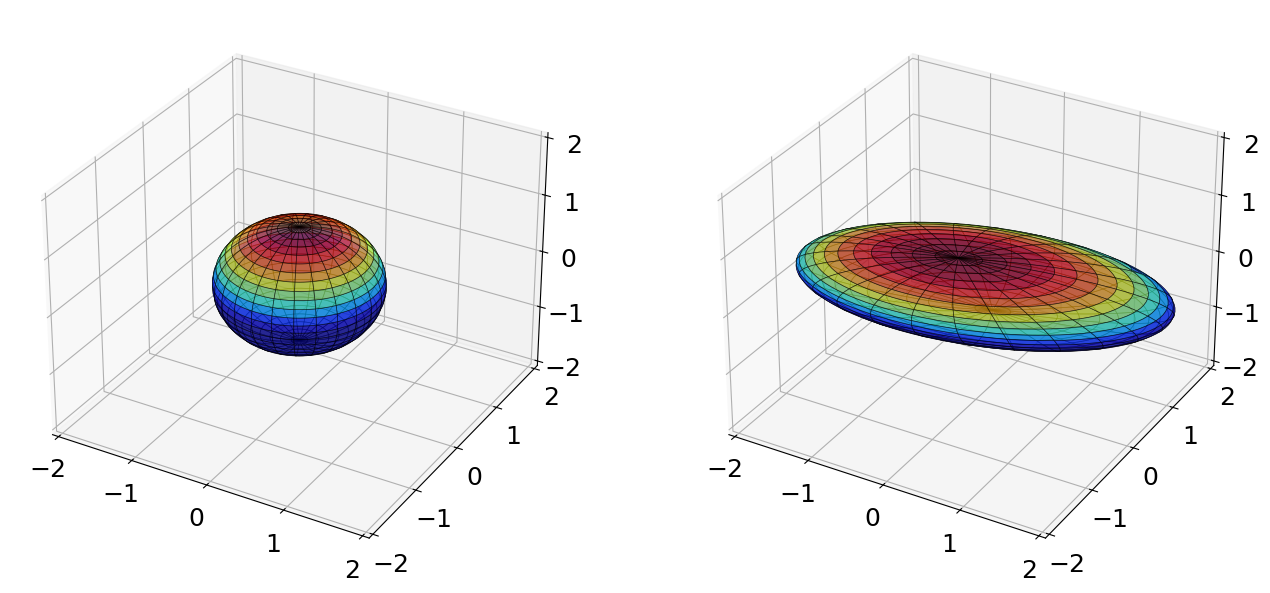

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size':18})

theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
pa = np.diag([3, 1, 0.5])

Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

Ry = np.array([[ np.cos(theta[1]), 0, np.sin(theta[1])],
               [0 , 1, 0],
               [ -np.sin(theta[1]), 0, np.cos(theta[1])]])

Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

X = Rx @ Ry @ Rz @ pa

fig = plt.figure()
ax1 = fig.add_subplot(121, projection = '3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)),np.cos(v))

"""
print(np.cos(u).shape)
print(x.shape)
#test1 = np.sin(v)
#print(test1.reshape((1,100)).shape)
t1 = np.sin(v).reshape((1,100))
t2 = np.cos(u).reshape((100,1))
x1 = t2@ t1
print(x1.shape)
print(np.min(x-x1))
"""

surf1 = ax1.plot_surface(x, y, z, cmap = 'jet', alpha = 0.6, facecolors = plt.cm.jet(z),linewidth=0.5,rcount=30,ccount=30)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X@vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]

ax2 = fig.add_subplot(122, projection = '3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet',alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(z),rcount=30,ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2,2)
ax2.set_ylim3d(-2,2)
ax2.set_zlim3d(-2,2)

plt.show()

(100, 2)
(2, 10000)
(2, 100)


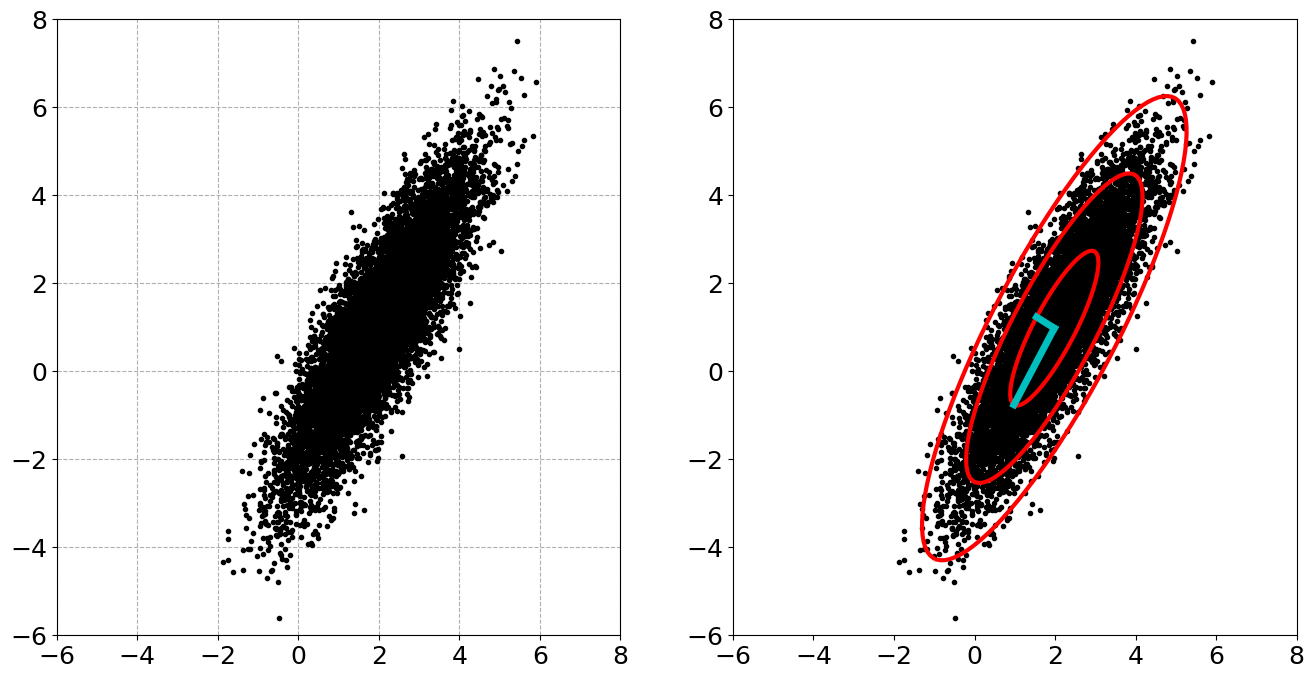

In [108]:
# PCA pre-processes the data by mean subtraction and setting the variance to unity before performing the SVD
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size':18})

n = 10000 # sample size
xc = np.array([2,1])
pa = np.array([2, 0.5])

theta = np.pi/3;

R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

data_points = R @ np.diag(pa) @ np.random.randn(2,n) + np.diag(xc) @ np.ones((2,n))

plt.figure()
plt.subplot(1,2,1)
plt.plot(data_points[0,:],data_points[1,:],'.k',label = 'Data points')
#plt.xlabel('x-coord')
#plt.ylabel('y-coord')
plt.grid(linestyle = '--')
plt.xlim((-6,8))
plt.ylim((-6,8))

Xmean = np.mean(data_points,axis=1)
#print(Xmean.shape)
#print(np.diag(Xmean)@np.ones((2,n)))
#print(Xmean)
#print(np.diag(Xmean))
#print(np.tile(Xmean,(n,1)).T)
B = data_points - np.tile(Xmean,(n,1)).T
U, S, VT = np.linalg.svd(B/np.sqrt(n),full_matrices=0)

plt.subplot(1,2,2)
plt.plot(data_points[0,:],data_points[1,:],'.k',label = 'Data points')

theta1 = 2*np.pi*np.arange(0,1,0.01)
print(np.array([np.cos(theta1), np.sin(theta1)]).T.shape)
print(VT.shape)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta1), np.sin(theta1)])
print(Xstd.shape)
plt.plot(Xmean[0]+Xstd[0,:], Xmean[1]+Xstd[1,:],'-r', linewidth = 3)
plt.plot(Xmean[0]+2*Xstd[0,:], Xmean[1]+2*Xstd[1,:],'-r', linewidth = 3)
plt.plot(Xmean[0]+3*Xstd[0,:], Xmean[1]+3*Xstd[1,:],'-r', linewidth = 3)

plt.plot(np.array([Xmean[0], Xmean[0]+U[0,0]*S[0]]), np.array([Xmean[1], Xmean[1]+U[1,0]*S[0]]),'-c',linewidth = 5)
plt.plot(np.array([Xmean[0], Xmean[0]+U[0,1]*S[1]]), np.array([Xmean[1], Xmean[1]+U[1,1]*S[1]]),'-c',linewidth = 5)
plt.xlim([-6,8])
plt.ylim([-6,8])
plt.show()

array([0.72770452, 0.23030523])

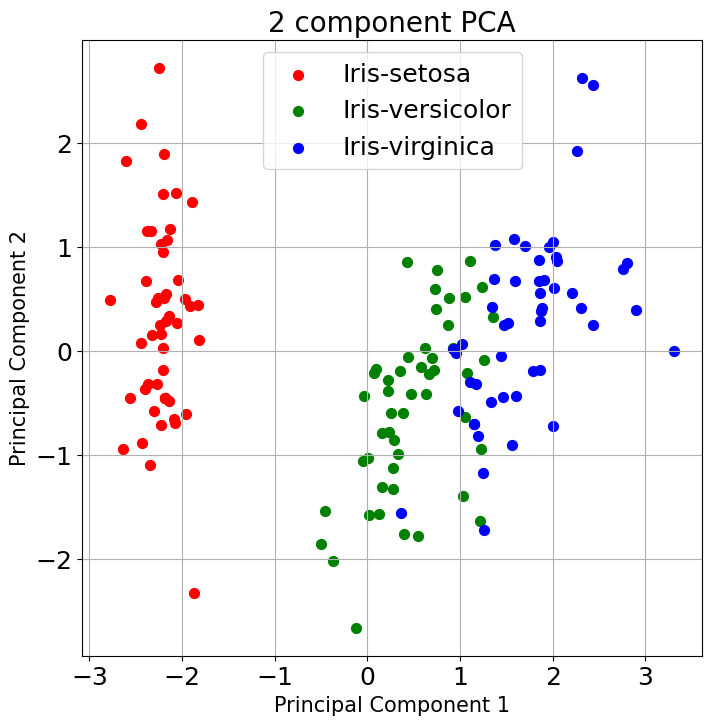

In [137]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
#Using StandardScaler to help standardize the data set’s features onto unit scale (mean = 0 and variance = 1)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


pca.explained_variance_ratio_

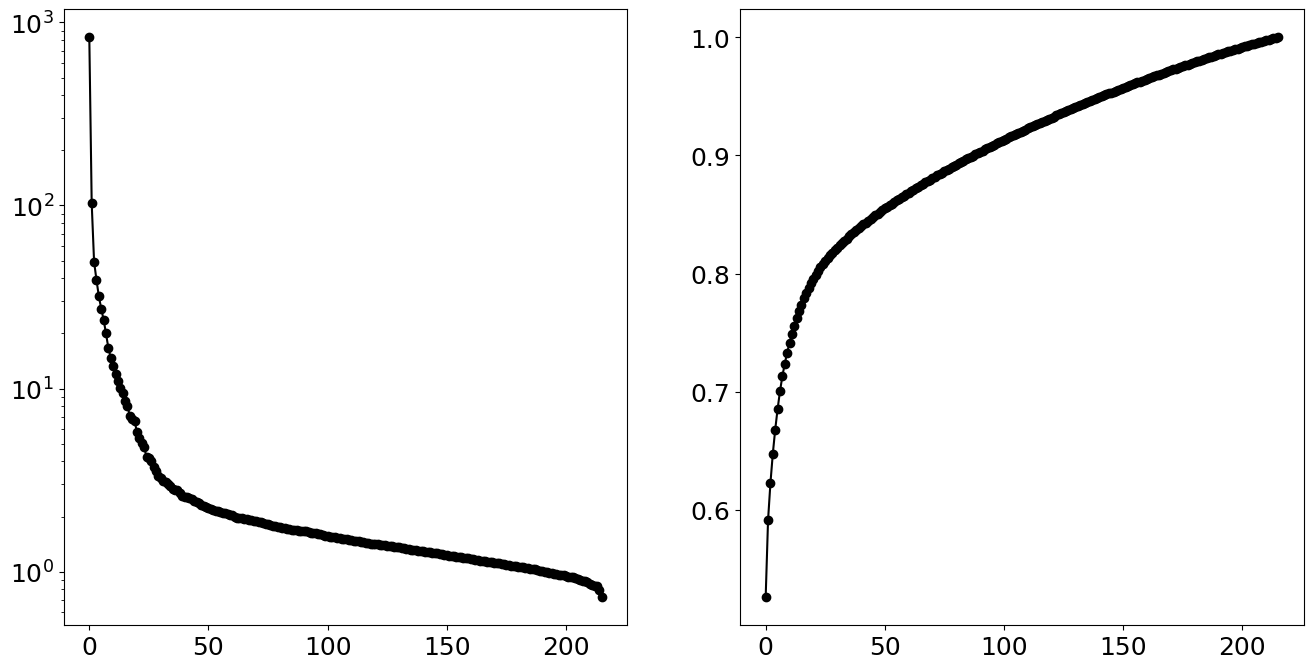

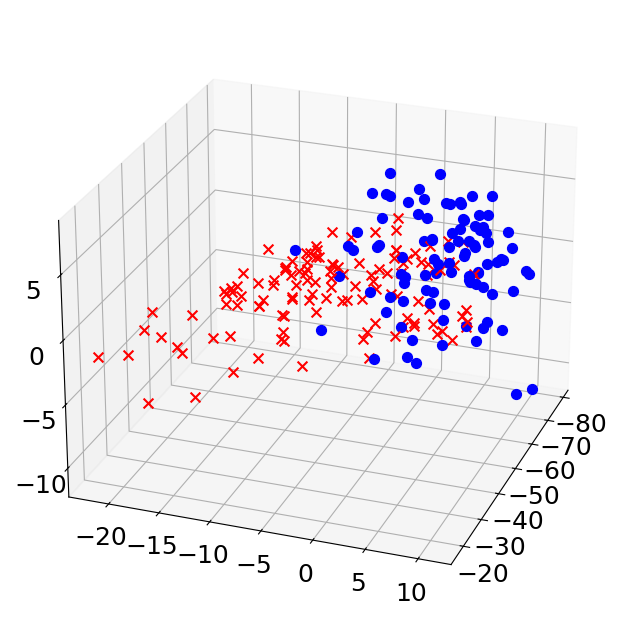

In [175]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

obs = np.loadtxt("DATA/ovariancancer_obs.csv",delimiter=',')

f = open("DATA/ovariancancer_grp.csv", "r")

grp = f.read().split("\n")

#print(obs)
#print(np.mean(obs,axis=0))
#print(grp)

U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.semilogy(S, '-ok')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(np.cumsum(S)/np.sum(S),'-ok')


fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1, projection = '3d')
for j in range(obs.shape[0]):
     x = VT[0,:] @ obs[j,:].T
     y = VT[1,:] @ obs[j,:].T
     z = VT[2,:] @ obs[j,:].T
     if grp[j] == 'Cancer':
         ax.scatter(x,y,z,marker='x',c='r',s=50)
     else:
         ax.scatter(x,y,z,marker='o',c='b',s=50)

ax.view_init(25,20)
plt.show()

C:\Users\simit\AppData\Local\Temp\ipykernel_9148\976964107.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(mat_contents['m'])
C:\Users\simit\AppData\Local\Temp\ipykernel_9148\976964107.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(mat_contents['n'])


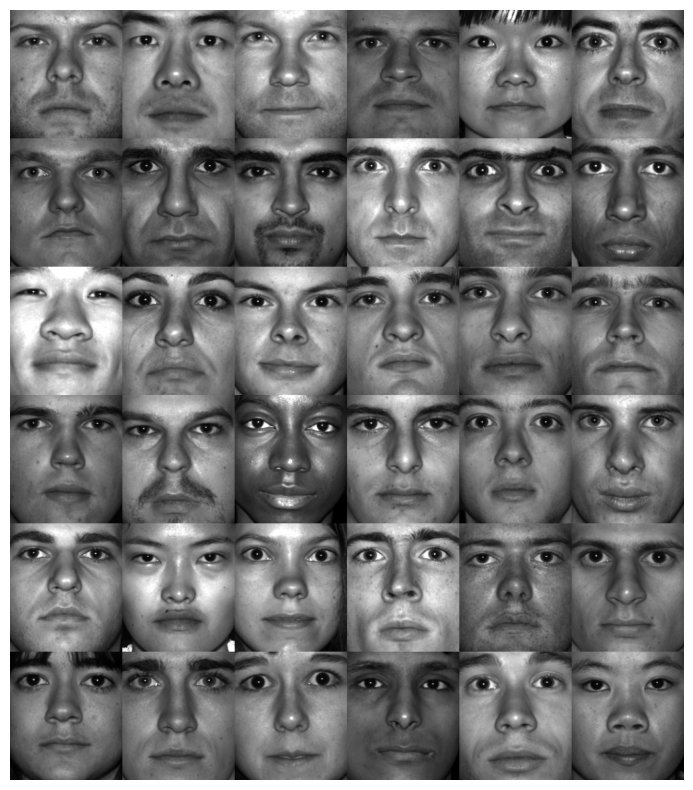

In [10]:
# Eigen faces
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size':18})

mat_contents = scipy.io.loadmat("DATA/allFaces.mat")

#print(mat_contents)

faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])


nfaces = np.ndarray.flatten(mat_contents['nfaces'])


allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()


In [12]:
for person in range(len(nfaces)):
    subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    
    count = 0
    
    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1
                
    #img = plt.imshow(allFaces)
    #img.set_cmap('gray')
    #plt.axis('off')
    #plt.show()

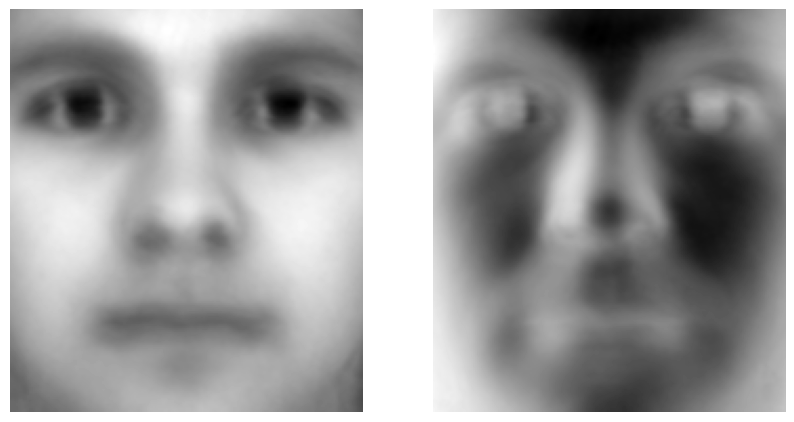

In [18]:
# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

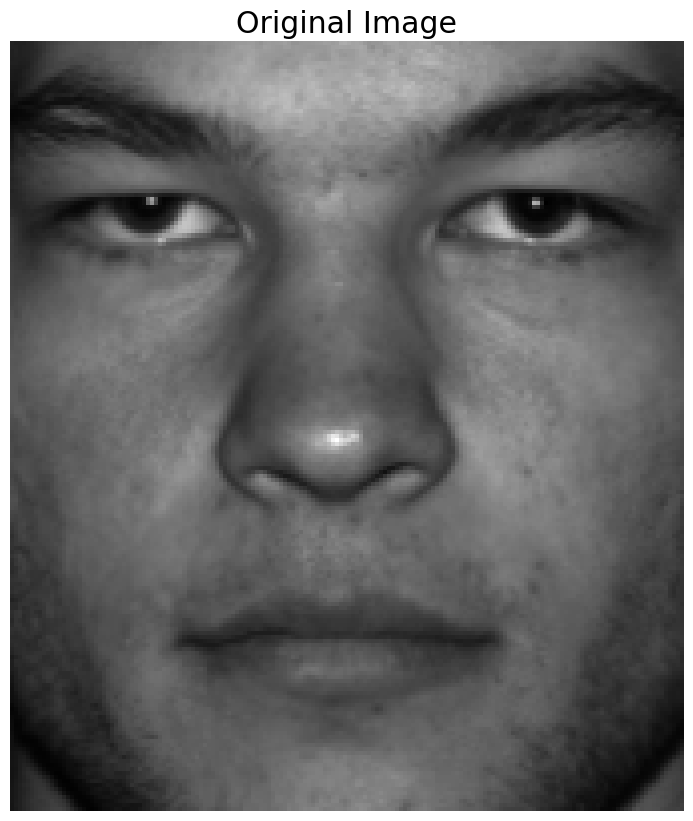

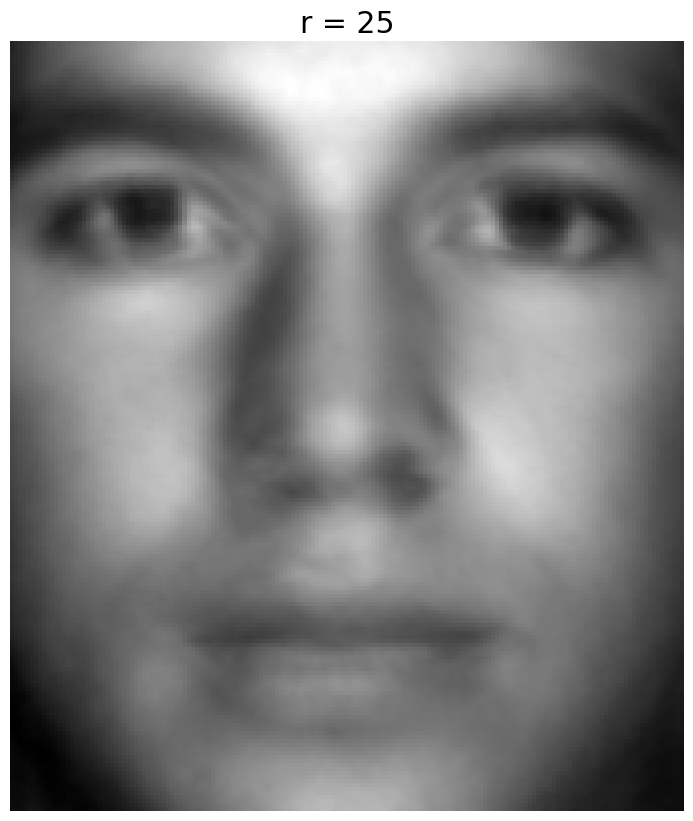

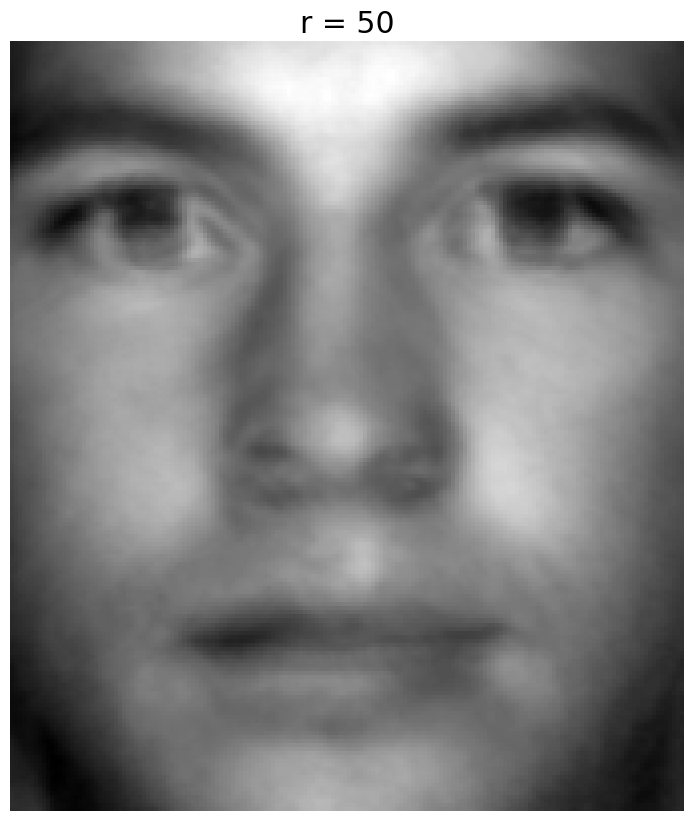

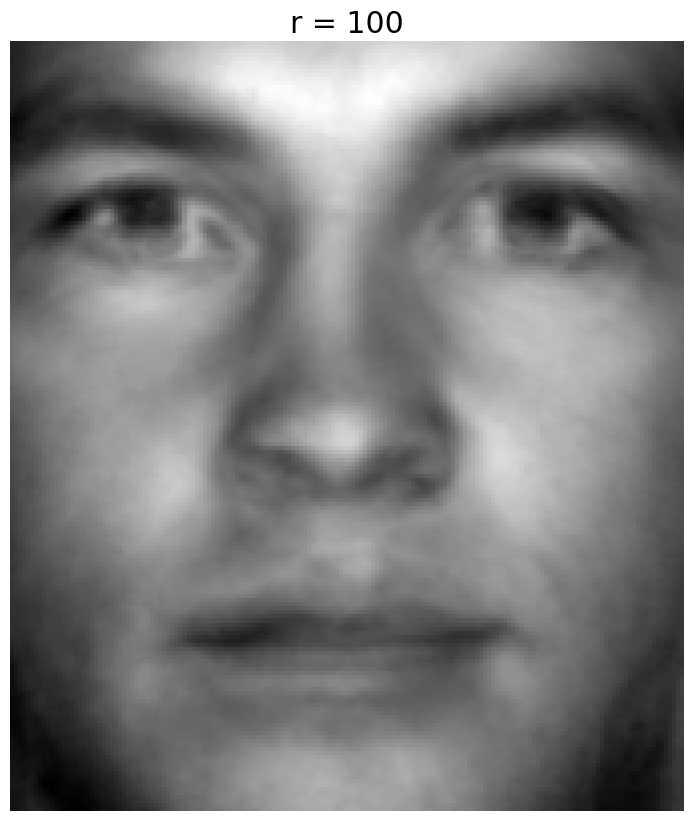

In [22]:
## Now show eigenface reconstruction of image that was omitted from test set

testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37
plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

testFaceMS = testFace - avgFace
r_list = [25, 50, 100]#, 200, 400, 800, 1600]

for r in r_list:
    reconFace = avgFace + U[:,:r]  @ U[:,:r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

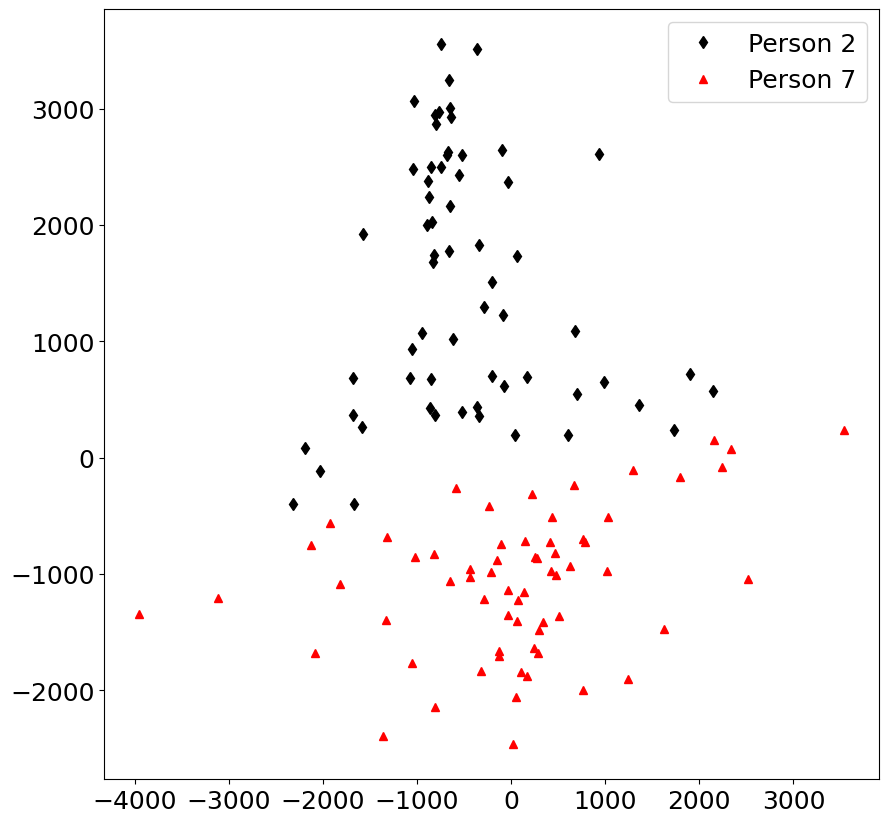

In [24]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'dk',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^r',label='Person 7')

plt.legend()
plt.show()

(32256, 62)
(32256, 2282)
(2, 62)
(2, 32256)


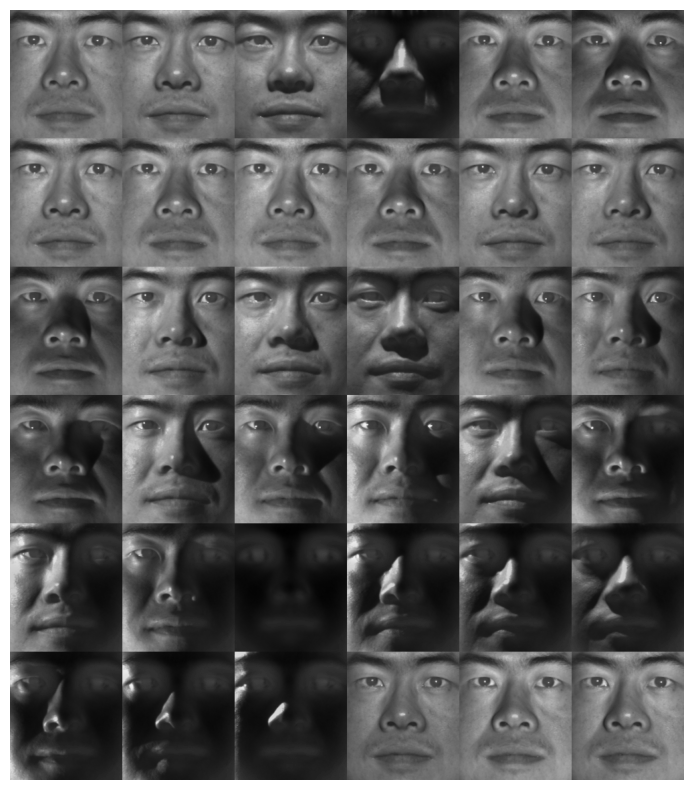

In [33]:
print(P1.shape)
print(U.shape)
print(PCACoordsP1.shape)
print(U[:,PCAmodes-np.ones_like(PCAmodes)].T.shape)

face_set = np.zeros((n*6,m*6))

for i in range(6):
    for j in range(6):
        face_set[i*n:(i+1)*n,j*m:(j+1)*m] = np.reshape(P1[:,6*i+j],(m,n)).T


fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
img_avg = ax1.imshow(face_set)
img_avg.set_cmap('gray')
plt.axis('off')

plt.show()

Text(0.5, 1.0, '90%')

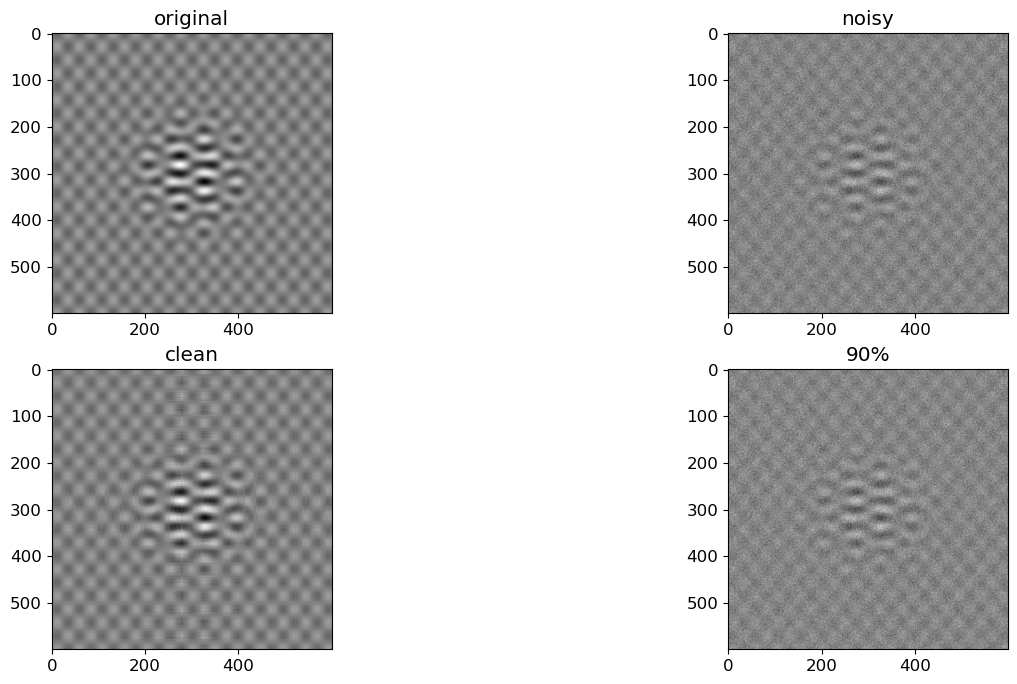

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':12})

# Generate underlying low-rank data
t = np.arange(-3,3,0.01)
Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T
X = Utrue @ Strue @ Vtrue.T

fig = plt.figure()
ax1 = plt.subplot(2,2,1)
ax1.imshow(X)
plt.title("original")
# Contaminate signal with noise
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)
ax2 = plt.subplot(2,2,2)
ax2.imshow(Xnoisy)
plt.title("noisy")
# Truncate using optimal hard threshold
U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma #Hard threshold
r = np.max(np.where(S > cutoff)) # Keep modes w/ S > cutoff
Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]
ax3 = plt.subplot(2,2,3)
ax3.imshow(Xclean)
plt.title("clean")
# Truncate to keep 90% of cumulative sum
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to keep 90% sum
X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
ax4 = plt.subplot(2,2,4)
ax4.imshow(X90)
plt.title("90%")

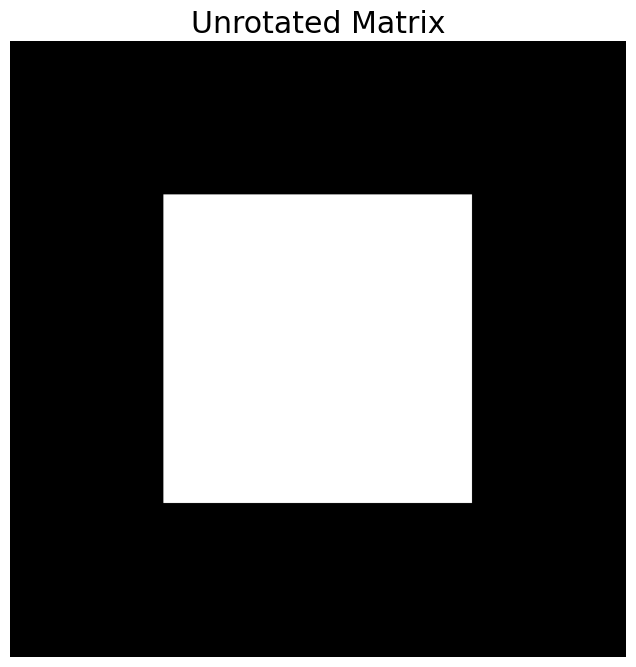

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})

n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q),(q-1):(3*q)] = 1

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Unrotated Matrix')
plt.show()


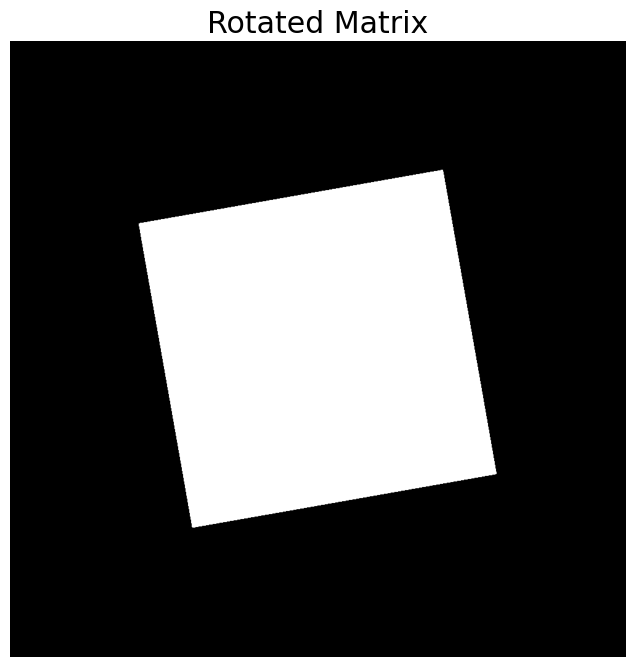

In [54]:
import skimage
X_rot = skimage.transform.rotate(X,10)
X_rot[np.nonzero(X_rot)] = 1

plt.imshow(X_rot)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Rotated Matrix')
plt.show()

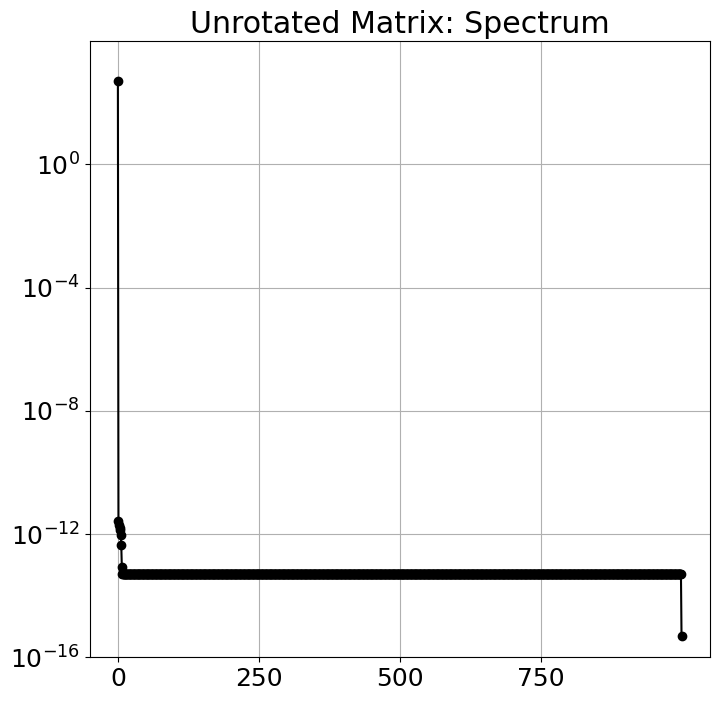

In [55]:
U, S, VT = np.linalg.svd(X,full_matrices=0)


plt.semilogy(S,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Unrotated Matrix: Spectrum')
plt.show()

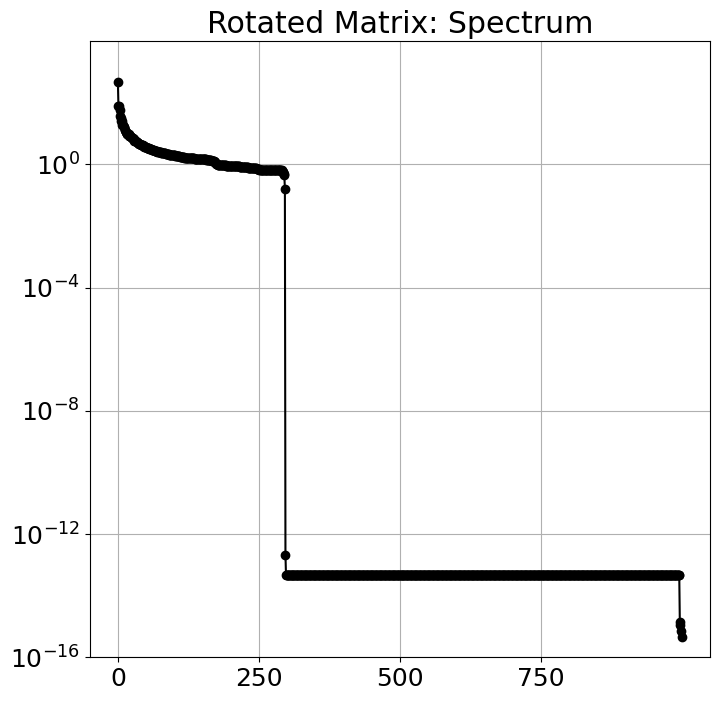

In [56]:
U_rot, S_rot, VT_rot = np.linalg.svd(X_rot,full_matrices=0)

plt.semilogy(S_rot,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Rotated Matrix: Spectrum')
plt.show()

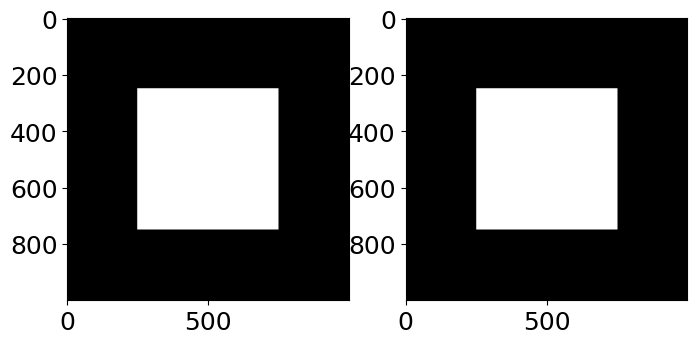

In [63]:
# unrotated
fig = plt.figure()

ax1 = plt.subplot(1,2,1)
ax1.imshow(X)
A1 = U[:,:3]@np.diag(S[:3])@VT[:3,:];
ax2 = plt.subplot(1,2,2)
ax2.imshow(A1)


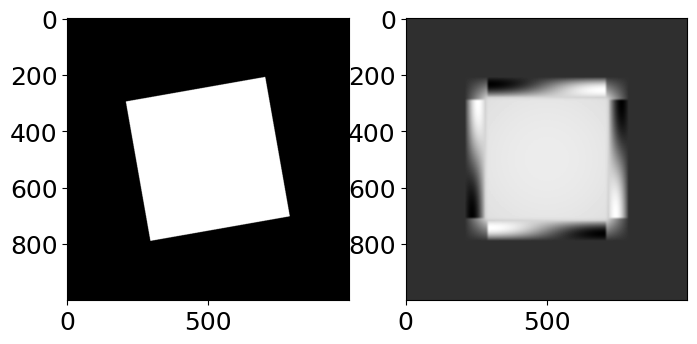

In [67]:
# rotated
fig = plt.figure()

ax1 = plt.subplot(1,2,1)
ax1.imshow(X_rot)
A1 = U_rot[:,:3]@np.diag(S_rot[:3])@VT_rot[:3,:];
ax2 = plt.subplot(1,2,2)
ax2.imshow(A1)


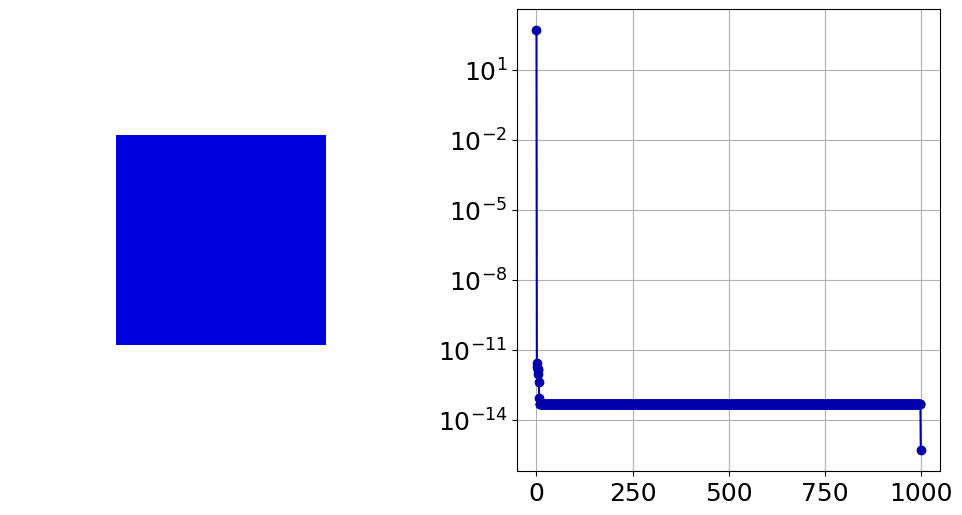

In [68]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import skimage.transform

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams.update({'font.size': 18})

n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q),(q-1):(3*q)] = 1

nAngles = 12 # Sweep through 12 different angles, from 0:4:44 degrees
cm_np = np.array([[0,0,2/3],
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])


cmap = plt.cm.jet
cmap.set_bad(alpha = 0.0)

U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
plt.imshow(np.ma.masked_where(X == 0, X),vmin=0,vmax=nAngles)
plt.set_cmap(cmap)
plt.axis('off')


ax2 = fig1.add_subplot(122)
plt.semilogy(S,'-o',color=tuple(cm_np[0]))
plt.grid()

plt.show()

C:\Users\simit\AppData\Local\Temp\ipykernel_9148\768308675.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[1].axis('on')


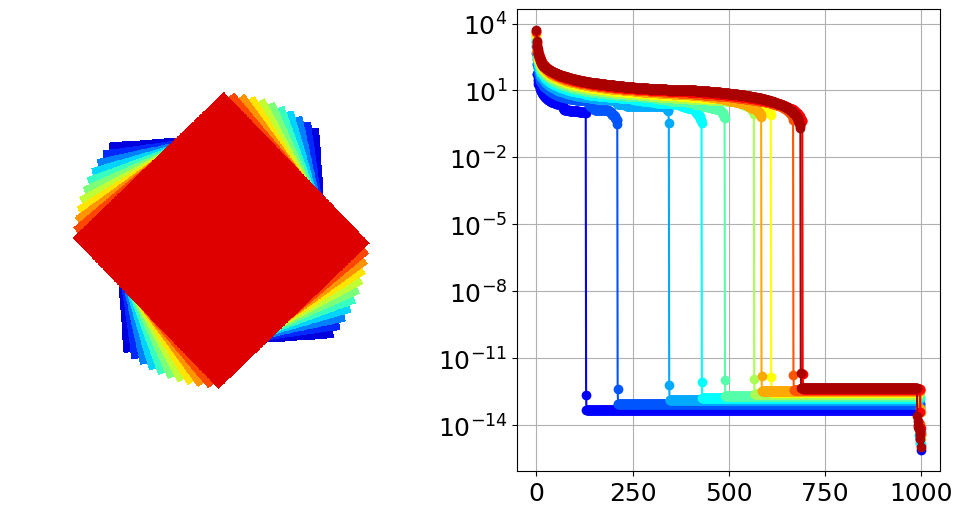

In [71]:
Xrot = X

fig, axs = plt.subplots(1,2)

for j in range(nAngles):
    Xrot = skimage.transform.rotate(X,j*4) #rotate by theta = j*4 degrees
    Xrot[np.nonzero(Xrot)] = j
    
    U, S, VT = np.linalg.svd(Xrot)

    axs[0].imshow(np.ma.masked_where(Xrot == 0, Xrot),vmin=0,vmax=nAngles)
    plt.set_cmap(cmap)
    axs[0].axis('off')

    axs[1].semilogy(S,'-o',color=tuple(cm_np[j]))
    axs[1].axis('on')
    axs[1].grid(1)

plt.show()

In [1]:
# Randomized SVD algorithm
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size':18})

def rSVD(X, r, q, p):
    nY = X.shape[1]
    P = np.random.randn(nY,r+p)
    Z = X@P
    for i in range(q):
        Z = X@(X.T @ Z)
    
    Q, R = np.linalg.qr(Z, mode = 'reduced')
    
    Y = Q.T @ X
    Uy, S, VT = np.linalg.svd(Y, full_matrices=0)
    
    U = Q@Uy
    
    return U, S, VT


(3207, 2260, 3)


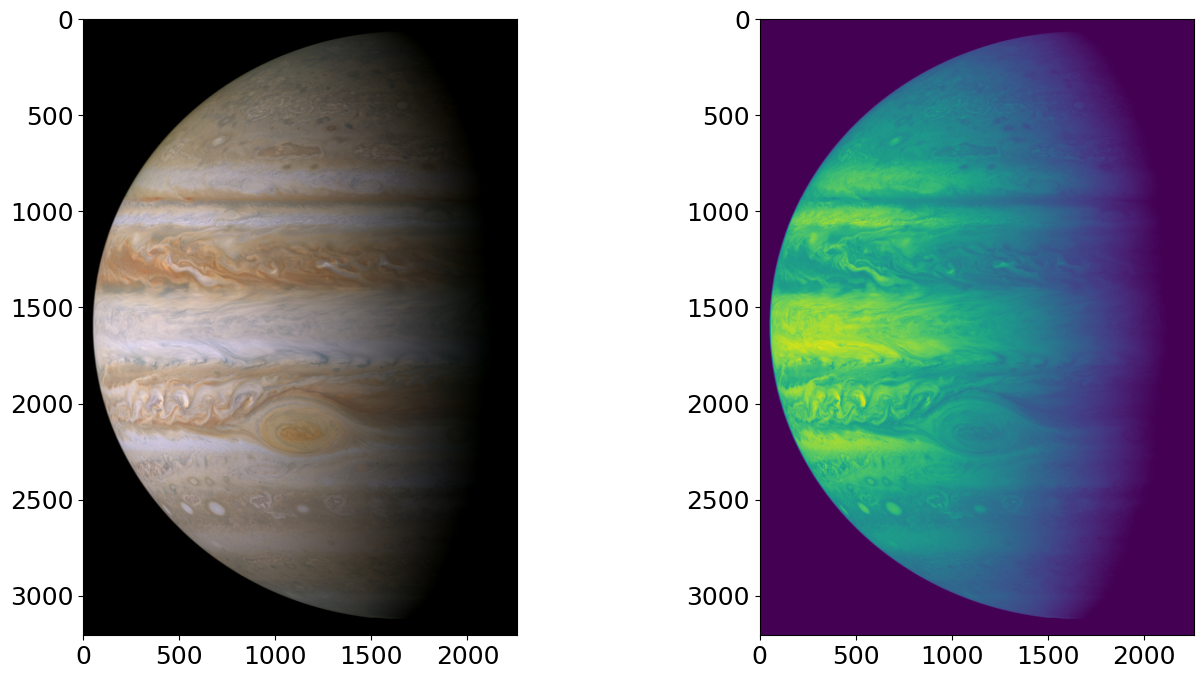

In [13]:
from matplotlib.image import imread

# Compute the randomized SVD of high-resolution image
A = imread("DATA/jupiter.jpg")
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(A)

X = np.mean(A, axis = 2)

print(A.shape)
plt.subplot(1,2,2)
plt.imshow(X)

U, S, VT = np.linalg.svd(X, full_matrices=0)

r = 400
q = 1
p = 5

rU, rS, rVT = rSVD(X,r,q,p)

0.00039233052613762086
0.0005086048467688978


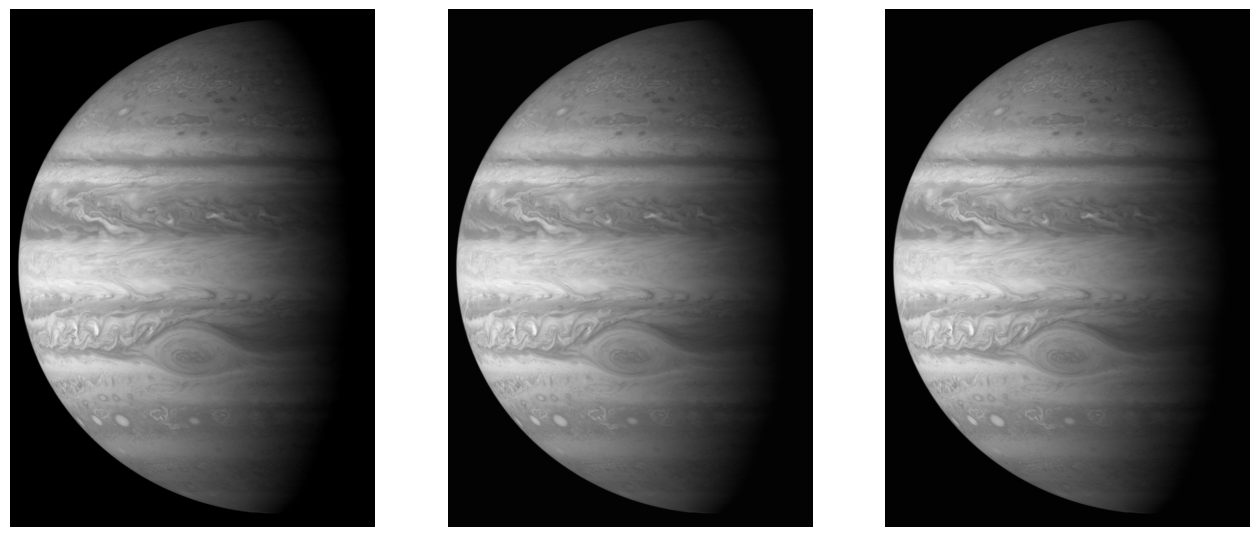

In [20]:
XSVD = U[:,:(r+1)]@np.diag(S[:(r+1)])@VT[:(r+1),:]

errSVD = np.linalg.norm(X-XSVD,ord=2)/np.linalg.norm(X,ord=2)

XrSVD = rU[:,:(r+1)]@np.diag(rS[:(r+1)])@rVT[:(r+1),:]
errrSVD = np.linalg.norm(X-XrSVD,ord=2)/np.linalg.norm(X,ord=2)

fig, axs = plt.subplots(1,3)
plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')


print(errSVD)
print(errrSVD)

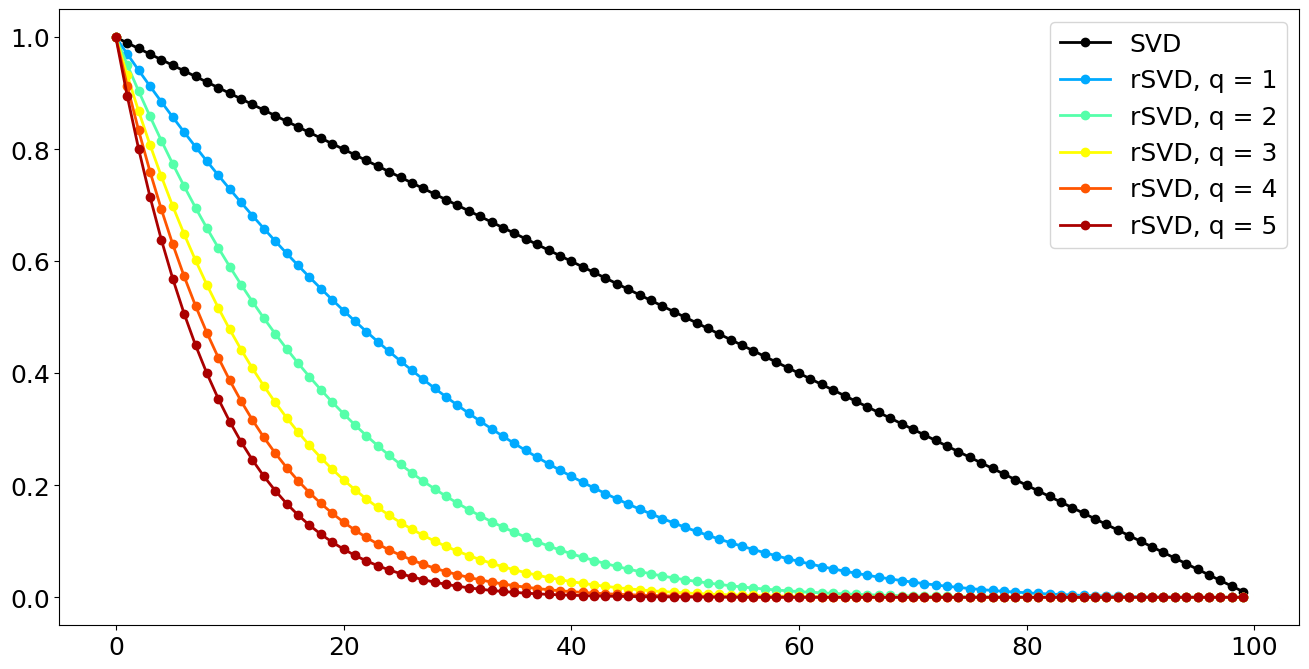

In [22]:
## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3],  # Define color map
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-k',linewidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),linewidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()

C:\Users\simit\AppData\Local\Temp\ipykernel_10512\3215807237.py:21: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  pcm = plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,0],vmin=-1,vmax=1,shading='interp')


ValueError: For X (102) and Y (122) with flat shading, A should have shape (121, 101, 3) or (121, 101, 4) or (121, 101) or (12221,), not (0,)

Error in callback <function _draw_all_if_interactive at 0x0000017DF6658720> (for post_execute), with arguments args (),kwargs {}:


ValueError: For X (102) and Y (122) with flat shading, A should have shape (121, 101, 3) or (121, 101, 4) or (121, 101) or (12221,), not (0,)

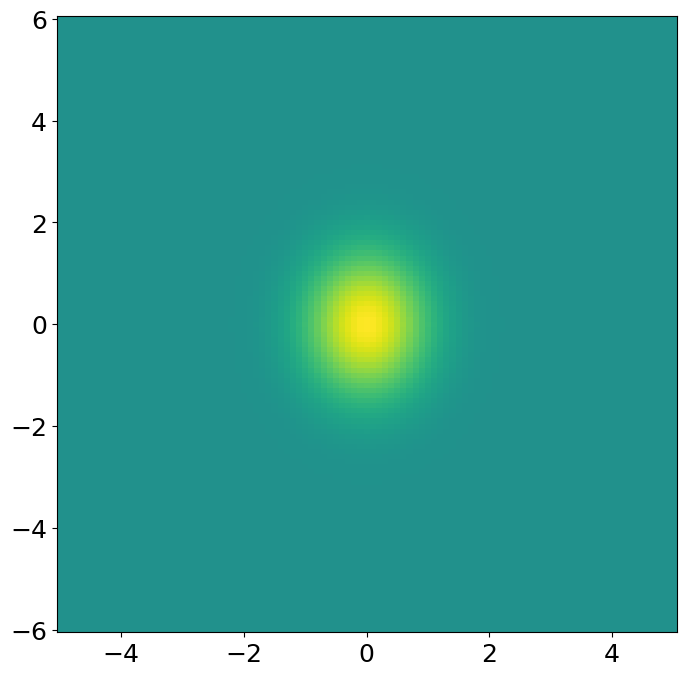

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML, display
# %matplotlib inline

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'

x = np.arange(-5,5.01,0.1)
y = np.arange(-6,6.01,0.1)
t = np.arange(0,10*np.pi+0.1,0.1)

X,Y,T = np.meshgrid(x,y,t)

A = np.exp(-(X**2 + 0.5*Y**2)) * np.cos(2*T) + \
    (np.divide(np.ones_like(X),np.cosh(X)) * np.tanh(X) * np.exp(-0.2*Y**2)) * np.sin(T)

fig = plt.figure()
pcm = plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,0],vmin=-1,vmax=1,shading='interp')

    
def init():
    pcm.set_array(np.array([]))
    return pcm

def animate(iter):
    pcm.set_array(A[:-1,:-1,iter].ravel())
#     print('Frame ' + str(iter))
    return pcm


anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(t),interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())
#display(HTML(anim.to_jshtml()))

C:\Users\simit\AppData\Local\Temp\ipykernel_812\1071371753.py:8: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,8*(j+1)-3],vmin=-1,vmax=1,shading='interp')


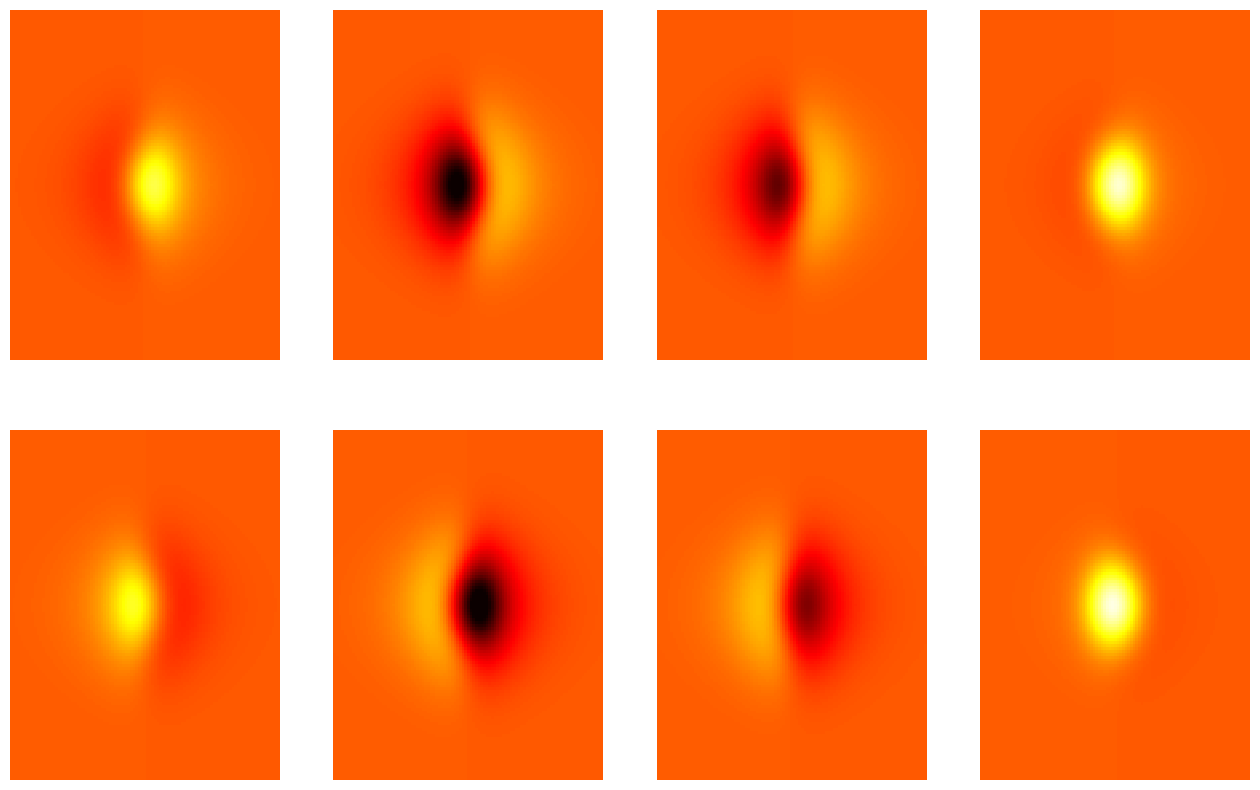

In [5]:
plt.rcParams['figure.figsize'] = [16,10]

fig, axs = plt.subplots(2,4)
axs = axs.reshape(-1)

for j in range(8):
    plt.sca(axs[j])
    plt.pcolormesh(X[:,:,0],Y[:,:,0],A[:,:,8*(j+1)-3],vmin=-1,vmax=1,shading='interp')
    axs[j].axis('off')
    plt.set_cmap('hot')

In [6]:
# Tensor factorization method requires the TensorLy module,
# available at http://tensorly.org/stable/installation.html

from tensorly.decomposition import parafac
plt.rcParams['figure.figsize'] = [12,12]


A1, A2, A3 = parafac(A,2)

fig, axs = plt.subplots(3,1)
axs[0].plot(y,A1,LineWidth=2)
axs[1].plot(x,A2,LineWidth=2)
axs[2].plot(t,A3,LineWidth=2)
plt.show()

ModuleNotFoundError: No module named 'tensorly'

(2000, 1500, 3)
0.0
[[0.00606977 0.0057307  0.00557691 ... 0.00471144 0.00501687 0.00517902]
 [0.0057307  0.00566781 0.00553861 ... 0.00466909 0.00497377 0.00515971]
 [0.00557691 0.00553861 0.00579702 ... 0.00474336 0.00500174 0.00526302]
 ...
 [0.00471144 0.00466909 0.00474336 ... 0.0130435  0.01285307 0.01220639]
 [0.00501687 0.00497377 0.00500174 ... 0.01285307 0.01361258 0.01311855]
 [0.00517902 0.00515971 0.00526302 ... 0.01220639 0.01311855 0.01300425]]
True
False


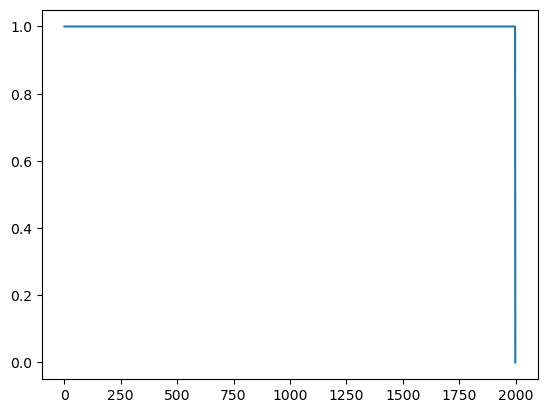

In [34]:
# Exercise 1.1

from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

A = imread("DATA/dog.jpg")#Load the image   --- os.path.join('..','DATA','dog.jpg')

# Taking the mean image
X = np.mean(A,axis = -1)

# Computing the full SVD
U, S, VT = np.linalg.svd(X, full_matrices=1)

r = 100 # choosing a random r

U1 = U[:,:r]

A1 = U1.T@U1
A2 = U1@U1.T
A1[A1<1e-12]=0
A2[A2<1e-12]=0

I1 = np.identity(A1.shape[0])
I2 = np.identity(A2.shape[0])

def check_identiy(A):
    n,m = np.shape(A)
    I1 = np.identity(A.shape[0])
    for i in range(n):
        for j in range(m):
            if np.around(A[i,j]) != I1[i,j]:
                return False
    return True
            
print(check_identiy(A1))
print(check_identiy(A2))

norm_error = []
n = A.shape[0]
for r in range(n):
    U1 = U[:,:(r+1)]
    A1 = U1@U1.T
    I1 = np.identity(n)
    err_val = A1 - I1
    norm_error.append(np.linalg.norm(err_val,ord = 2))

plt.figure()
plt.plot(norm_error)
    

TypeError: unsupported operand type(s) for -: 'int' and 'list'

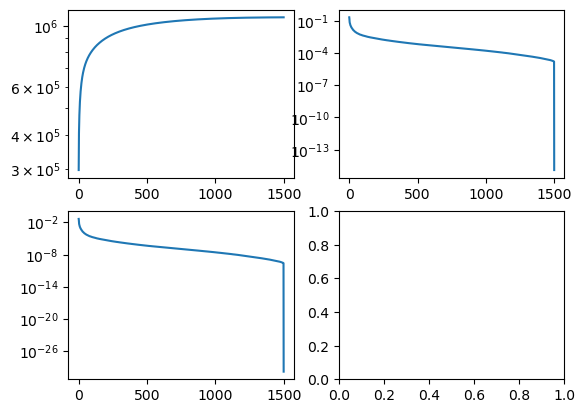

In [35]:
# Exercise 1.2
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

A = imread("DATA/dog.jpg")#Load the image   --- os.path.join('..','DATA','dog.jpg')

# Taking the mean image
X = np.mean(A,axis = -1)

# Computing the full SVD
U, S, VT = np.linalg.svd(X, full_matrices=0)

XSVD = U@np.diag(S)@VT#U[:,:(r+1)]@np.diag(S[:(r+1)])@VT[:(r+1),:]

errSVD = np.linalg.norm(X-XSVD,ord=2)/np.linalg.norm(X,ord=2)
errSVD_list = []
frac_missing_var = []

m = X.shape[1]
for r in range(m):
    XSVD = U[:,:(r+1)]@np.diag(S[:(r+1)])@VT[:(r+1),:]
    errSVD = np.linalg.norm(X-XSVD,ord=2)/np.linalg.norm(X,ord=2)
    errSVD_list.append(errSVD)
    frac_missing_var.append(errSVD**2)
    

NameError: name 'cdS' is not defined

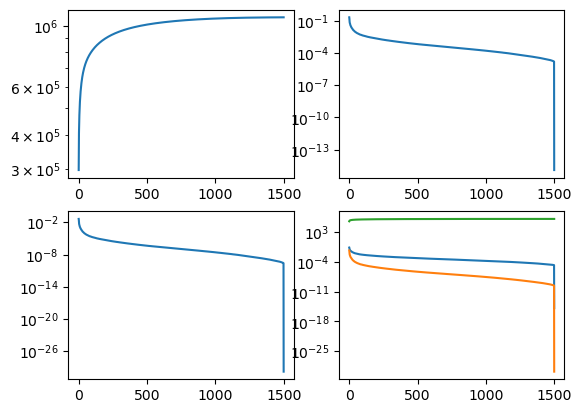

In [37]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.semilogy(np.cumsum(S))

plt.subplot(2,2,2)
plt.semilogy(errSVD_list)


plt.subplot(2,2,3)
plt.semilogy(frac_missing_var)


plt.subplot(2,2,4)
plt.semilogy(errSVD_list)
plt.semilogy(frac_missing_var)
plt.semilogy(np.cumsum(S))

E1 = errSVD_list # Forbenius norm
r1 = np.min(np.where(cdS > 0.99)) # Find r to keep 99% sum

E2 = 1- frac_missing_var # Variance
r2 = np.min(np.where(cdS > 0.99)) # Find r to keep 99% sum

E3 = np.cumsum(S) / np.sum(S) # Cumulative energy
r3 = np.min(np.where(cdS > 0.99)) # Find r to keep 99% sum

print([r1, r2, r3])

plt.figure()
plt.plot(E1,label = 'Forbenius norm')
plt.plot(E2,label = 'Variance')
plt.plot(E3,label = 'Cummulative energy')